# 8. Movement and Rotation of the Detector

### Everything is entered in the pyramid coordinate system, i.e. the origin is located at the center of the pyramid, with the edges of the pyramid 

- Mira Liu 12/15/19

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl

%matplotlib inline

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit

import math

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

from MuonTomographyFunctions import *

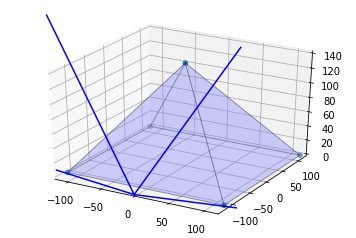

In [25]:
fig = pl.figure()
ax = pl.axes(projection='3d')

#pyramid vertices in pyramid coordinate system now
v = np.array([[-115.165,-115.165,0],[115.165,-115.165,0],[115.165,115.165,0],[-115.165,115.165,0],[0,0,138.7]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

#pyramid planes
verts = [ [v[0],v[1],v[4]], [v[0],v[3],v[4]],
 [v[2],v[1],v[4]], [v[2],v[3],v[4]], [v[0],v[1],v[2],v[3]]]

#plot 2d planes connecting vertices
collection = Poly3DCollection(verts, linewidths=1, alpha=0.2)
face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
collection.set_facecolor(face_color)
ax.add_collection3d(collection)
collection.set_edgecolor('k')

xyax = np.linspace(0, 150,20)
zeroz=np.zeros(20)
zax = np.linspace(0,190,20)

#pl.plot(xyax,zeroz,zeroz,color = 'r',label = 'x-axis')
#pl.plot(zeroz,xyax,zeroz,color = 'g',label = 'y-axis')
#pl.plot(zeroz,zeroz,zax,color = 'b',label = 'z-axis')

#plotting angular ranges
x = np.linspace(0,27)
az1 = x/np.cos(78.23*np.pi/180) #84.05 is max theta
az2 = -x/np.cos(78.23*np.pi/180)

pol1 = az1/np.sin(39.81*np.pi/180) #22.62 is max theta 
pol2 = -az2/np.sin(39.81*np.pi/180) #22.62 is max theta 

ax.plot(az1, x-(230.33/2)-27, zs=0, zdir='z',color = 'b')
ax.plot(az2, x-(230.33/2)-27, zs=0, zdir='z',color= 'b')
ax.plot(az1, x-(230.33/2)-27, pol1, zdir='z',color = 'b')
ax.plot(az2, x-(230.33/2)-27, pol2, zdir='z',color= 'b')
pl.ylim(-135,120)
pl.xlim(-115,115)
ax.set_zlim(0,140)
pl.savefig('/Users/Mira/Desktop/DetectorRange',dpi=300)
pl.show()



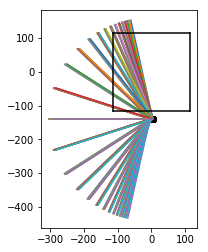

In [40]:
i = np.arange(1,960,64) #480 horizontally
#j = np.arange(1,240,64) #120 vertically
phis = []
etas = []
for Hpix in i: #for all 480 pixels along the x axis
    for H in i: #for every pixel on the second detector x axis
        # for every combination of pixels
        di = Hpix-H #horizontal relative displacement
        dj = 0 #zero vertical relative displacement
        X = 0 #in pyramid coordinate system
        Y = -((230.33/2)+25) #in pyramid coordinate system
        Vpix = 0
        theta = 90
        phi_n, xi0_n,psi, x1, y1 = SRSinogramSpace(Hpix, Vpix,X,Y,theta,di,dj,200)
        #print(psi)
        x,y = VectorPlot(x1,y1,psi)
        pl.scatter(x1,y1,color = 'k')
        pl.plot(x,y)
pl.plot(p1,p2,color = 'k')
pl.plot(p1,p3,color = 'k')
pl.plot(p2,p1,color='k')
pl.plot(p3,p1,color = 'k')
pl.gca().set_aspect('equal', adjustable='box')
#pl.savefig('/Users/medicalphysics/Desktop/Fan.png',dpi = 300)
pl.show()

In [27]:
def SRSinogramSpace(i,j,X,Y,theta,dx,dy,dz):
    theta = theta*np.pi/180 #translation to theta in radians
    if dx == 0:
        psi = np.pi/2 + theta #directly forward in detector system
    else:
        psi = math.atan(dz/dx)
        if psi<=0:
            psi = math.atan(dz/dx)+np.pi
        psi = psi+ theta
    phi = psi-(np.pi/2)
    x = (i-(960/2))/100 + X # in pyramid space
    y = Y # in pyramid space
    z = 0 #in pyramid space, with j = 0
    xi0 = x*math.cos(phi)+y*math.sin(phi)
    if phi<0:
        phi = phi + np.pi
    return phi, xi0, psi, x, y
def OneSinogramSpace(i,j,X,Y,theta):
    phis = []
    xis = []
    psis = []
    x1s = []
    y1s = []
    for Hpix in i: #for all 480 pixels along the x axis
        for H in i: #for every pixel on the second detector x axis
            # for every combination of pixels
            di = Hpix-H #horizontal relative displacement (in cm)
            dj = 0 #zero vertical relative displacement
            Vpix = 0#by default
            phi_n, xi0_n,psi,x1,y1 = SRSinogramSpace(Hpix, Vpix,X,Y, theta,di,dj,200)
            phis.append(phi_n)
            xis.append(xi0_n)
            psis.append(psi)
            x1s.append(x1)
            y1s.append(y1)
    return phis,xis,psis,x1s,y1s

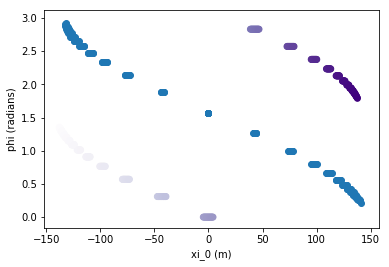

In [28]:
i = np.arange(1,960,64) #480 horizontally
j = np.arange(1,240,2) #120 vertically
X = 0 #in pyramid coordinate system
Y = -((230.33/2)+25) #in pyramid coordinate system
theta = 0
phis,xis,psis,x1s,y1s=OneSinogramSpace(i,j,X,Y,theta)
purples = pl.get_cmap("Purples")
pl.scatter(xis,phis,c=xis,cmap=purples)
#now shifted
theta = 90
X = (230.33/2)+25 #in pyramid coordinate system
Y = 0 #in pyramid coordinate system
phis,xis,psis,x1s,y1s=OneSinogramSpace(i,j,X,Y,theta)
pl.scatter(xis,phis)
pl.xlabel('xi_0 (m)')
pl.ylabel('phi (radians)')
#pl.savefig('/Users/medicalphysics/Desktop/SinogramSpace.png',dpi = 300)
pl.show()



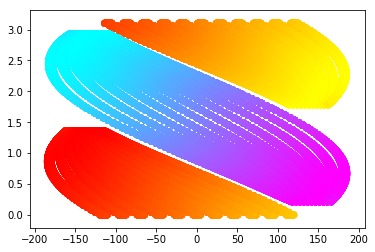

In [33]:
i = np.arange(1,960,8) #480 horizontally
j = np.arange(1,240,64) #120 vertically
reds = pl.get_cmap("autumn")
blues = pl.get_cmap("cool")
for X in np.linspace(-115,115,11):
    Y = -((230.33/2)+25) #in pyramid coordinate system
    theta = 0
    phis,xis,psis,x1s,y1s=OneSinogramSpace(i,j,X,Y,theta)
    pl.scatter(xis,phis,c=xis,cmap=reds)
for Y in np.linspace(-115,115,11):
    X =(230.33/2)+25 #in pyramid coordinate system
    theta = 90
    phis,xis,psis,x1s,y1s=OneSinogramSpace(i,j,X,Y,theta)
    pl.scatter(xis,phis,c = xis,cmap = blues)
#pl.xlabel('xi_0 (m)')
#pl.ylabel(tt'phi (radians)')
pl.savefig('/Users/Mira/Desktop/CoveredSinogram',dpi=300)
pl.show()



i = np.arange(1,960,2) #480 horizontally
j = np.arange(1,240,2) #120 vertically
for theta in range(-90,90,11):
    X = 0
    Y = -((230.33/2)+25) #in pyramid coordinate system
    phis,xis,psis,x1s,y1s=OneSinogramSpace(i,j,X,Y,theta)
    pl.scatter(xis,phis)
pl.xlabel('xi_0 (m)')
pl.ylabel('phi (radians)')
pl.show()

